In [82]:
import os
%pwd

'c:\\ML_Projects\\MLflow_Implementation\\MLFlow-End-to-End-implementation'

In [83]:
os.chdir("../")

In [84]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path

In [85]:
from mlflowProject.constants import *
from mlflowProject.utils.common import read_yaml,create_directories

In [86]:
class ConfigurationManager:
    def __init__(
            self,
            config_filepath = CONFIG_FILE_PATH,
            params_filepath = PARAMS_FILE_PATH,
            schema_filepath = SCHEMA_FILE_PATH):
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    def get_data_transformation_config(self)-> DataTransformationConfig:
        config= self.config.data_transformation
        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir=config.root_dir,
            data_path=config.data_path,
        )
        return data_transformation_config
    

In [87]:
import os
from mlflowProject import logger
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [88]:
data = pd.read_csv(r"C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\artifacts\data_ingestion\Train-Set.csv")
data.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [89]:
data.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [90]:
(data.isnull().sum()/len(data)) *100

ProductID             0.000000
Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

In [91]:
data.shape

(8523, 12)

In [92]:
print(data['ProductID'].unique())
print("\n")
data['ProductID'].nunique()

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']




1559

In [93]:
data['ProductID'] = data['ProductID'].apply(lambda x: x[:2])
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
data['ProductID'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [95]:
data["FatContent"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [96]:
data['FatContent'] = data['FatContent'].apply(lambda x: 'lf' if x in ['Low Fat',"low fat",'LF'] else 'reg')
data['FatContent'].unique()

array(['lf', 'reg'], dtype=object)

In [97]:
data['FatContent'].value_counts()

FatContent
lf     5517
reg    3006
Name: count, dtype: int64

In [98]:
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FD,9.30,lf,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [99]:
data['ProductType'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [100]:
data['ProductType'].value_counts()

ProductType
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [101]:
data['OutletID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [102]:
data['OutletID'] = data['OutletID'].str.replace('OUT0',"").astype(int)

In [103]:
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
data.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID               int32
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [105]:
data['EstablishmentYear'] = 2024 - data['EstablishmentYear']

In [106]:
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,26,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


In [107]:
data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [108]:
print(data['Weight'].mean())
print("\n")
print(data['Weight'].median())

12.857645184135976


12.6


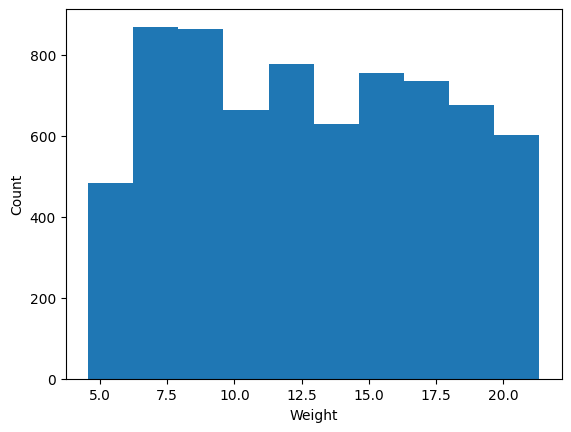

In [109]:
plt.hist(data['Weight'])
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

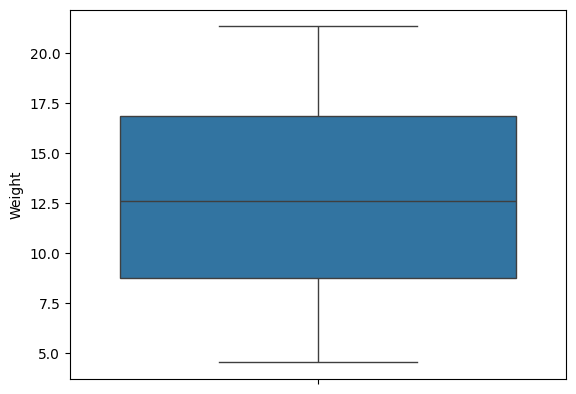

In [110]:
sns.boxplot(data['Weight'])
plt.show()

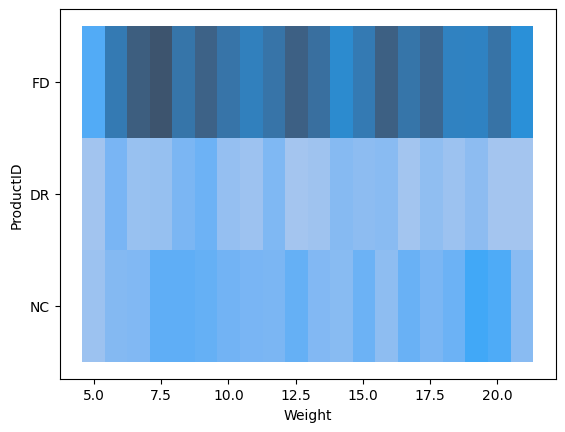

In [111]:
sns.histplot(data,x="Weight",y='ProductID')
plt.show()

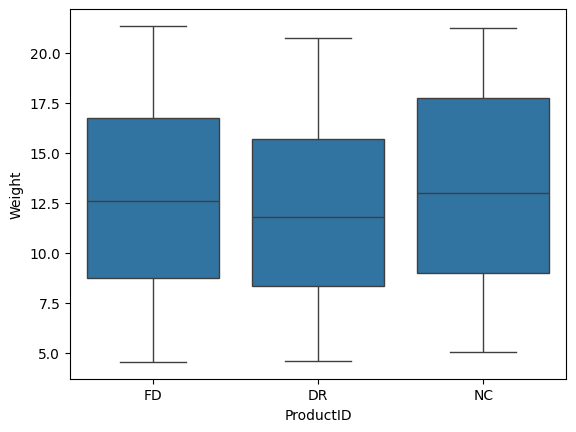

In [112]:
sns.boxplot(data,x='ProductID',y='Weight')
plt.show()

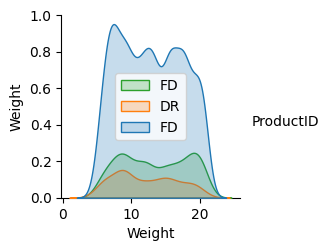

In [113]:
sns.pairplot(data[['ProductID','Weight']],hue="ProductID")
plt.legend(data['ProductID'])
plt.show()

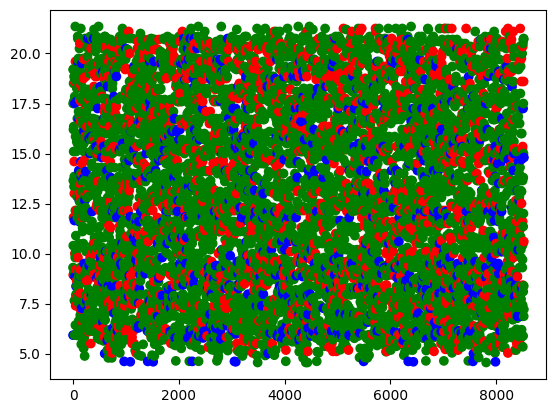

In [114]:
color_scatter = data['ProductID'].map({"FD":"g","DR":'b',"NC":"r"})
plt.scatter(range(len(data)),data['Weight'],c=color_scatter)
plt.show()

In [115]:
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,26,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


In [116]:
data.groupby('ProductID')['Weight'].mean()

ProductID
DR    12.072348
FD    12.832186
NC    13.354532
Name: Weight, dtype: float64

In [117]:
data.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID               int32
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

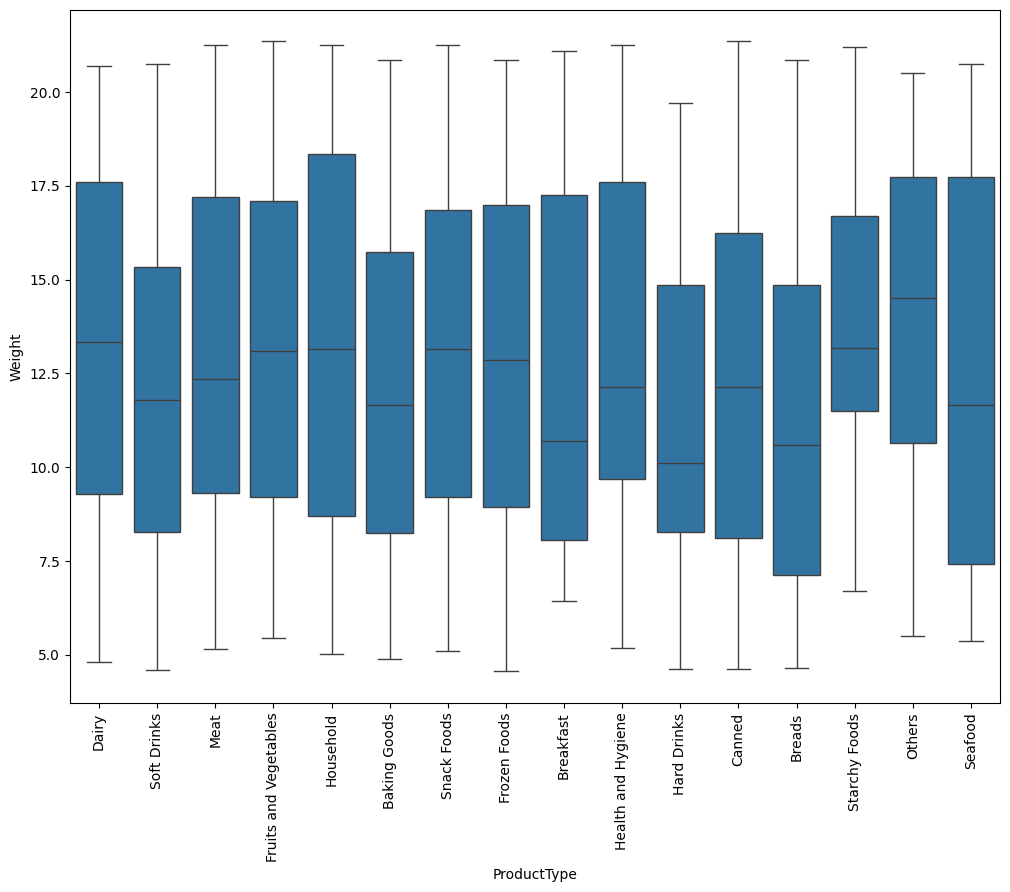

In [118]:
plt.figure(figsize=(12,9))
sns.boxplot(data=data,x='ProductType',y='Weight')
plt.xticks(rotation=90)
plt.show()

In [119]:
avg_weight = round(data.groupby('ProductType')['Weight'].mean(),2)
avg_weight

ProductType
Baking Goods             12.28
Breads                   11.35
Breakfast                12.77
Canned                   12.31
Dairy                    13.43
Frozen Foods             12.87
Fruits and Vegetables    13.22
Hard Drinks              11.40
Health and Hygiene       13.14
Household                13.38
Meat                     12.82
Others                   13.85
Seafood                  12.55
Snack Foods              12.99
Soft Drinks              11.85
Starchy Foods            13.69
Name: Weight, dtype: float64

In [120]:
data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [121]:
data.shape

(8523, 12)

In [122]:
data.groupby('ProductType')['Weight'].transform('mean')

0       13.426069
1       11.847460
2       12.817344
3       13.224769
4       13.384736
          ...    
8518    12.987880
8519    12.277108
8520    13.142314
8521    12.987880
8522    11.847460
Name: Weight, Length: 8523, dtype: float64

In [123]:
avg_weight = data.groupby('ProductType')['Weight'].transform('mean')

In [124]:
data['Weight'] = data['Weight'].fillna(avg_weight)
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,26,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


In [125]:
data.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [126]:
data['OutletSize'].value_counts()

OutletSize
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [127]:
data['LocationType'].value_counts()

LocationType
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [128]:
pd.crosstab(data['OutletSize'],columns=data['LocationType'])

LocationType,Tier 1,Tier 2,Tier 3
OutletSize,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [129]:
data['OutletType'].value_counts()

OutletType
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [130]:
pd.crosstab(data['OutletSize'],columns=data['OutletType'])

OutletType,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
OutletSize,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0



#### Example

In [131]:

# data = pd.DataFrame({
#     'OutletSize': ['Small', 'Medium', None, 'Large', 'Small'],
#     'Sales': [100, 150, 200, 250, 300]
# })

# # Filtering out rows where OutletSize is not null
# filtered_data = data[~data['OutletSize'].isnull()]

# print(filtered_data)


In [132]:
data_os0= data[data['OutletSize'].isnull()]

In [133]:
data_os1 = data[~data['OutletSize'].isnull()]

In [134]:
data_os0.loc[:,'OutletSize'] = data_os0.loc[:,'LocationType'].apply(lambda x:'Medium' if x =="Tear3" else 'Small')

In [135]:
data_os0.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
3,FD,19.200,reg,0.000000,Fruits and Vegetables,182.0950,10,26,Small,Tier 3,Grocery Store,732.3800
8,FD,16.200,reg,0.016687,Frozen Foods,96.9726,45,22,Small,Tier 2,Supermarket Type1,1076.5986
9,FD,19.200,reg,0.094450,Frozen Foods,187.8214,17,17,Small,Tier 2,Supermarket Type1,4710.5350
25,NC,13.000,lf,0.099887,Household,45.9060,17,17,Small,Tier 2,Supermarket Type1,838.9080
28,FD,5.925,reg,0.161467,Dairy,45.5086,10,26,Small,Tier 3,Grocery Store,178.4344


In [136]:
data = pd.concat((data_os0,data_os1),axis='rows')
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
3,FD,19.200,reg,0.000000,Fruits and Vegetables,182.0950,10,26,Small,Tier 3,Grocery Store,732.3800
8,FD,16.200,reg,0.016687,Frozen Foods,96.9726,45,22,Small,Tier 2,Supermarket Type1,1076.5986
9,FD,19.200,reg,0.094450,Frozen Foods,187.8214,17,17,Small,Tier 2,Supermarket Type1,4710.5350
25,NC,13.000,lf,0.099887,Household,45.9060,17,17,Small,Tier 2,Supermarket Type1,838.9080
28,FD,5.925,reg,0.161467,Dairy,45.5086,10,26,Small,Tier 3,Grocery Store,178.4344


In [137]:
data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [138]:
for i in data['MRP']:
    if i ==249.8092:
        print("mill gya!!")
    else:
        pass

mill gya!!


In [139]:
data.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID               int32
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [140]:
X = data.drop('OutletSales', axis='columns')
y = data['OutletSales']

In [141]:
X.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
3,FD,19.200,reg,0.000000,Fruits and Vegetables,182.0950,10,26,Small,Tier 3,Grocery Store
8,FD,16.200,reg,0.016687,Frozen Foods,96.9726,45,22,Small,Tier 2,Supermarket Type1
9,FD,19.200,reg,0.094450,Frozen Foods,187.8214,17,17,Small,Tier 2,Supermarket Type1
25,NC,13.000,lf,0.099887,Household,45.9060,17,17,Small,Tier 2,Supermarket Type1
28,FD,5.925,reg,0.161467,Dairy,45.5086,10,26,Small,Tier 3,Grocery Store


In [142]:
X['Weight'].nunique()

431

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
# l = LabelEncoder()
X=pd.get_dummies(X)
y=np.log(y)

In [145]:
# X['FatContent'] = l.fit_transform(X['FatContent'])
# X['ProductType'] = l.fit_transform(X['ProductType'])
# X['OutletSize'] = l.fit_transform(X['OutletSize'])
# X['LocationType'] = l.fit_transform(X['LocationType'])
# X['OutletType'] = l.fit_transform(X['OutletType'])
# X['ProductID'] = l.fit_transform(X['ProductID'])

In [146]:
X.head()

,Weight,ProductVisibility,MRP,OutletID,EstablishmentYear,ProductID_DR,ProductID_FD,ProductID_NC,FatContent_lf,FatContent_reg,...,OutletSize_High,OutletSize_Medium,OutletSize_Small,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
3,19.200,0.000000,182.0950,10,26,False,True,False,False,True,...,False,False,True,False,False,True,True,False,False,False
8,16.200,0.016687,96.9726,45,22,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
9,19.200,0.094450,187.8214,17,17,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
25,13.000,0.099887,45.9060,17,17,False,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
28,5.925,0.161467,45.5086,10,26,False,True,False,False,True,...,False,False,True,False,False,True,True,False,False,False


In [147]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1,random_state=42)

In [148]:
class DataTransformation:
    def __init__(self,config: DataTransformationConfig):
        self.config = config
        self.data = pd.read_csv(r"C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\artifacts\data_ingestion\Train-Set.csv")

    def data_types(self):
        datatypes = self.data.dtypes
        logger.info("Data types of all features inside data \n", datatypes)
        return datatypes
    
    def data_missing(self):
        missing = self.data.isnull().sum()/len(self.data)
        percentage_missing = missing *100
        logger.info("Data missing \n",percentage_missing)
        return percentage_missing
    
    def feature_transformation(self):
        data = self.data
        data['ProductID'] = data['ProductID'].apply(lambda x: x[:2])
        data['FatContent'] = data['FatContent'].apply(lambda x: "lf" if x in ['Low Fat',"low fat", "lf"] else 'reg')
        logger.info(data['ProductID'].unique())
        logger.info(data['FatContent'].unique())
        data['OutletID'] = data['OutletID'].str.replace('OUT0',"").astype(int)
        current_year = datetime.date.today().year
        data['EstablishmentYear'] = current_year - data['EstablishmentYear']
        avg_weight = data.groupby('ProductType')['Weight'].transform('mean')
        data['Weight'] = data['Weight'].fillna(avg_weight)
        data_os0= data[data['OutletSize'].isnull()]
        data_os1 = data[~data['OutletSize'].isnull()]
        data_os0.loc[:,'OutletSize'] = data_os0.loc[:,'LocationType'].apply(lambda x:'Medium' if x =="Tear3" else 'Small')
        data = pd.concat((data_os0,data_os1),axis='rows')
        # X =data.drop("OutletSales",axis='columns')
        # y = data['OutletSales']
        logger.info(data.shape)
        # logger.info(X.shape)
        # logger.info(y.shape)
        return data                                 #, X, y
    def data_split(self):
        data = self.feature_transformation()
        train,test = train_test_split(data,test_size=0.2,random_state=42)
        train.to_csv(os.path.join(self.config.root_dir,"train.csv"),index =False)
        test.to_csv(os.path.join(self.config.root_dir,"test.csv"),index=False)
        logger.info("Splited data into training and test sets")
        logger.info(train.shape)
        logger.info(test.shape)
        print(test.shape)
        print(train.shape)

In [149]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation = data_transformation.data_split()

except Exception as e:
    raise e

[2024-11-18 09:37:07,264: INFO: common: json file loaded sucessfully from: C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\config\config.yaml]
[2024-11-18 09:37:07,295: INFO: common: json file loaded sucessfully from: C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\params.yaml]
[2024-11-18 09:37:07,322: INFO: common: json file loaded sucessfully from: C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\schema.yaml]
[2024-11-18 09:37:07,326: INFO: common: created directory at artifacts]
[2024-11-18 09:37:07,329: INFO: common: created directory at artifacts\data_transformation]


[2024-11-18 09:37:07,378: INFO: 111424077: ['FD' 'DR' 'NC']]
[2024-11-18 09:37:07,381: INFO: 111424077: ['lf' 'reg']]
[2024-11-18 09:37:07,402: INFO: 111424077: (8523, 12)]
[2024-11-18 09:37:07,515: INFO: 111424077: Splited data into training and test sets]
[2024-11-18 09:37:07,517: INFO: 111424077: (6818, 12)]
[2024-11-18 09:37:07,519: INFO: 111424077: (1705, 12)]
(1705, 12)
(6818, 12)


In [150]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(Xtrain,ytrain)

LinearRegression()

In [151]:
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = model1.predict(Xtest)
mae_test = mean_absolute_error(ytest,y_pred)
r2 = r2_score(ytest,y_pred)


print("Mean Abs Error: ", mae_test," R2 Score: ", r2)

Mean Abs Error:  0.40430207477873153  R2 Score:  0.7451602192701665


In [152]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_pram = {"alpha":[0.001,0.01,0.1,1,10,100]}
model2 = Ridge()
ridge_search = GridSearchCV(model2,ridge_pram,cv=5,scoring='neg_mean_squared_error')
ridge_search.fit(Xtrain,ytrain)

best_ridge_model = ridge_search.best_estimator_


print("Best alpha: ", ridge_search.best_params_['alpha'])

Best alpha:  0.001


In [153]:
from sklearn.metrics import mean_absolute_error,r2_score

y_ridge = best_ridge_model.predict(Xtest)

mae_ridge = mean_absolute_error(ytest,y_ridge)

r2_ridge = r2_score(y_ridge,ytest)


print("Ridge Test R2 Score: ", r2_ridge, " Mean Abs Error: ", mae_ridge)

Ridge Test R2 Score:  0.6543129612711805  Mean Abs Error:  0.40426238755710453


In [154]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Ridge regression hyperparameter tuning
lasso_param_grid = {'alpha' : [0.001,0.01,0.1,1,10,100],"tol":[0.001,0.01,0.1,1,10],'random_state':[42,55,30,105,5],'max_iter':[1000,2000,5000,10000]}
model3 = Lasso()

lasso_grid_search = GridSearchCV(model3 , lasso_param_grid, cv=5 , scoring = 'neg_mean_squared_error')
lasso_grid_search.fit(Xtrain,ytrain)

#best ridge model
best_lasso_model = lasso_grid_search.best_estimator_

#Print best aplha value
print("Best Lasso params" , lasso_grid_search.best_params_)
print("Best Lasso alpha" , lasso_grid_search.best_params_['alpha'])

Best Lasso params {'alpha': 0.001, 'max_iter': 1000, 'random_state': 42, 'tol': 0.1}
Best Lasso alpha 0.001


In [155]:
from sklearn.metrics import mean_absolute_error,r2_score

ytrainPre = best_lasso_model.predict(Xtrain)
ytestPre = best_lasso_model.predict(Xtest)

maeTest = mean_absolute_error(ytest,ytestPre)
r2Test = r2_score(ytest,ytestPre)

print({"Mean Abs Error":mae_test, "R2_Test" : r2Test})

{'Mean Abs Error': 0.40430207477873153, 'R2_Test': 0.746714334179884}
